# Artificial Neural Networks with Keras

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/AbdelMahm/INPT-2020/blob/master/Notebooks_DL/ANN_with_keras.ipynb"><img src="https://colab.research.google.com/img/colab_favicon_256px.png" />Run in Google Colab</a>
  </td>
</table>

# Setup

In [ ]:
Firstly, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [ ]:
# TensorFlow ≥2.0 is required
import tensorflow as tf

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Building an Image Classifier

First let's import TensorFlow and Keras.

In [ ]:
from tensorflow import keras

In [ ]:
tf.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in `keras.datasets`. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


The training set contains 60,000 grayscale images, each 28x28 pixels:

In [ ]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):

In [ ]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's `imshow()` function, with a `'binary'`
 color map:

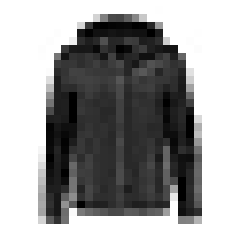

In [ ]:
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

Here are the corresponding class names:

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

So the first image in the training set is a coat:

In [ ]:
class_names[y_train[0]]

'Coat'

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

Let's take a look at a sample of the images in the dataset:

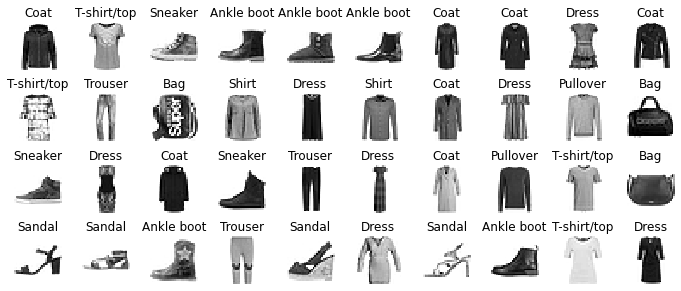

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Construct a Model

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
keras.backend.clear_session()
np.random.seed(42)

### or using the folowing method

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.layers

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer(hidden1.name) is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()

In [ ]:
weights

array([[-0.04027592, -0.03815939, -0.03457739, ..., -0.0220395 ,
        -0.03768707,  0.04808785],
       [-0.0207916 ,  0.04183336, -0.0531814 , ...,  0.00355804,
        -0.03605325, -0.05112766],
       [ 0.07152978, -0.01331939,  0.03569436, ..., -0.06532834,
        -0.07238536,  0.06502827],
       ...,
       [-0.01933625,  0.03264941,  0.06862405, ...,  0.01555853,
        -0.00390499, -0.04672204],
       [ 0.05918828,  0.02407545,  0.04309208, ..., -0.04648394,
        -0.04626602,  0.06056498],
       [ 0.06387131, -0.0742605 ,  0.03462157, ..., -0.00946505,
         0.05098282,  0.02588927]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
biases.shape

(300,)

### Compile the Model
Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

This is equivalent to:

```python
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```

### Train the model
Here you can chose how many epochs you need and the batch size.

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 3ms/step - loss: 0.7126 - accuracy: 0.7644 - val_loss: 0.5085 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4882 - accuracy: 0.8290 - val_loss: 0.4454 - val_accuracy: 0.8474
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4420 - accuracy: 0.8444 - val_loss: 0.4163 - val_accuracy: 0.8582
Epoch 4/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4157 - accuracy: 0.8536 - val_loss: 0.4131 - val_accuracy: 0.8544
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3945 - accuracy: 0.8609 - val_loss: 0.3774 - val_accuracy: 0.8694
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3795 - accuracy: 0.8664 - val_loss: 0.3822 - val_accuracy: 0.8684
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3649 - accuracy: 0.8705 - val_loss: 0.3606 - val_accuracy:

In [ ]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

### Plot learning Curves

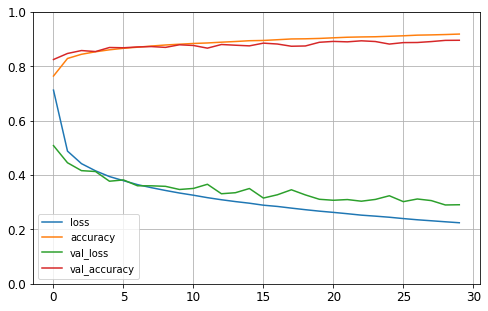

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3223 - accuracy: 0.8848


[0.32234567403793335, 0.8848000168800354]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.03, 0.  , 0.01, 0.  , 0.96],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
#y_pred = model.predict_classes(X_new)
y_pred=np.argmax(model.predict(X_new ), axis=-1)
y_pred 

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

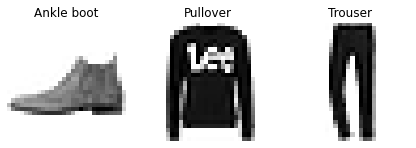

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Exercise

#### 1) Plot Learning curves when using different optimizers
#### 2) Plot Learning curves when using different batch size
#### 3) Plot Learning curves when using different number of epochs
#### 4) Add additional neurons and use Dropout Layer. Plot Learning curves.
#### 5) Use Batch Normalisation
#### 6) repeat with more layers
#### 7) apply on different datasets

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 4ms/step - loss: 0.4865 - accuracy: 0.8263 - val_loss: 0.3681 - val_accuracy: 0.8704
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3656 - accuracy: 0.8666 - val_loss: 0.3681 - val_accuracy: 0.8676
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3269 - accuracy: 0.8795 - val_loss: 0.3197 - val_accuracy: 0.8836
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3050 - accuracy: 0.8859 - val_loss: 0.3283 - val_accuracy: 0.8800
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2864 - accuracy: 0.8930 - val_loss: 0.3079 - val_accuracy: 0.8870
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2716 - accuracy: 0.8984 - val_loss: 0.3073 - val_accuracy: 0.8862
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2568 - accuracy: 0.9023 - val_loss: 0.3127 - val_accuracy

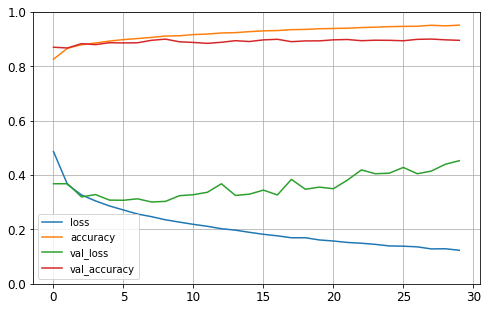

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.5022 - accuracy: 0.8865


[0.5022153854370117, 0.8865000009536743]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1252 - accuracy: 0.9535 - val_loss: 0.5919 - val_accuracy: 0.9010
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1338 - accuracy: 0.9510 - val_loss: 0.6289 - val_accuracy: 0.8996
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1412 - accuracy: 0.9493 - val_loss: 0.6946 - val_accuracy: 0.8962
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1514 - accuracy: 0.9476 - val_loss: 0.7043 - val_accuracy: 0.8944
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1527 - accuracy: 0.9473 - val_loss: 0.7110 - val_accuracy: 0.8964
Epoch 6/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1594 - accuracy: 0.9463 - val_loss: 0.7749 - val_accuracy: 0.8968
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1648 - accuracy: 0.9463 - val_loss: 0.8894 - val_accuracy:

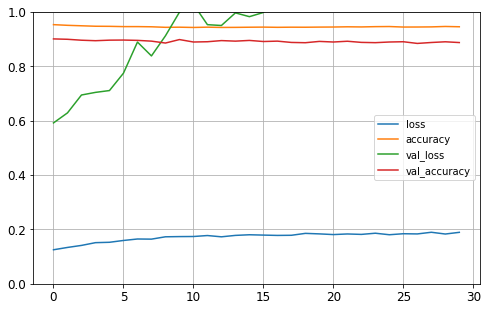

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3357 - accuracy: 0.8830


[1.3357130289077759, 0.8830000162124634]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adamax",
              metrics=["accuracy"])

In [ ]:
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1018 - accuracy: 0.9658 - val_loss: 1.3241 - val_accuracy: 0.8954
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0845 - accuracy: 0.9703 - val_loss: 1.2761 - val_accuracy: 0.8948
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0792 - accuracy: 0.9715 - val_loss: 1.3465 - val_accuracy: 0.8968
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0764 - accuracy: 0.9720 - val_loss: 1.3192 - val_accuracy: 0.8960
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0733 - accuracy: 0.9732 - val_loss: 1.3284 - val_accuracy: 0.8936
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0718 - accuracy: 0.9732 - val_loss: 1.3554 - val_accuracy: 0.8938
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0689 - accuracy: 0.9745 - val_loss: 1.3574 - val_accuracy:

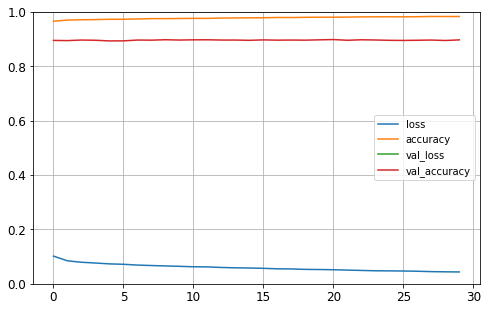

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.4790 - accuracy: 0.8940


[1.478979468345642, 0.8939999938011169]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=100, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.2772 - accuracy: 0.9058 - val_loss: 0.4615 - val_accuracy: 0.8898
Epoch 2/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.8668 - accuracy: 0.7713 - val_loss: 1.0080 - val_accuracy: 0.7052
Epoch 3/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.5184 - accuracy: 0.8295 - val_loss: 0.9558 - val_accuracy: 0.7368
Epoch 4/30
1100/1100 [==============================] - 3s 3ms/step - loss: 0.4130 - accuracy: 0.8612 - val_loss: 0.5199 - val_accuracy: 0.8564
Epoch 5/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.3691 - accuracy: 0.8744 - val_loss: 0.5267 - val_accuracy: 0.8578
Epoch 6/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.3409 - accuracy: 0.8827 - val_loss: 0.4987 - val_accuracy: 0.8656
Epoch 7/30
1100/1100 [==============================] - 3s 3ms/step - loss: 0.3207 - accuracy: 0.8894 - val_loss: 0.6325 - val_accuracy:

KeyboardInterrupt: ignored

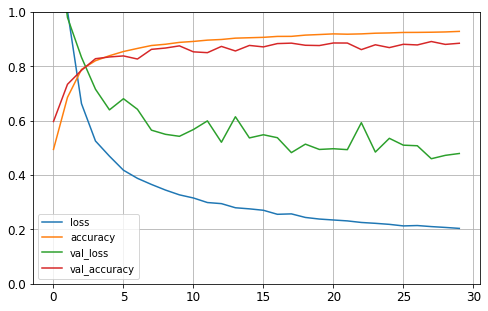

In [ ]:

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5039 - accuracy: 0.8766


[0.5039207935333252, 0.8766000270843506]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=50, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.2123 - accuracy: 0.9241 - val_loss: 0.5064 - val_accuracy: 0.8708
Epoch 2/30
1100/1100 [==============================] - 3s 3ms/step - loss: 0.2050 - accuracy: 0.9268 - val_loss: 0.5119 - val_accuracy: 0.8796
Epoch 3/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.2081 - accuracy: 0.9265 - val_loss: 0.4887 - val_accuracy: 0.8850
Epoch 4/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.2061 - accuracy: 0.9264 - val_loss: 0.4541 - val_accuracy: 0.8882
Epoch 5/30
1100/1100 [==============================] - 4s 3ms/step - loss: 0.2047 - accuracy: 0.9270 - val_loss: 0.5133 - val_accuracy: 0.8790
Epoch 6/30
1100/1100 [==============================] - 3s 3ms/step - loss: 0.2008 - accuracy: 0.9273 - val_loss: 0.4248 - val_accuracy: 0.8882
Epoch 7/30
1100/1100 [==============================] - 3s 3ms/step - loss: 0.1951 - accuracy: 0.9300 - val_loss: 0.4702 - val_accuracy:

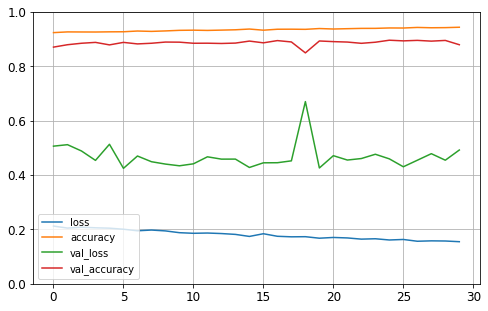

In [ ]:

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.5648 - accuracy: 0.8693


[0.5647796392440796, 0.8693000078201294]

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])
history = model.fit(X_train, y_train, batch_size=150, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
367/367 [==============================] - 2s 4ms/step - loss: 0.1250 - accuracy: 0.9545 - val_loss: 0.4597 - val_accuracy: 0.8942
Epoch 2/30
367/367 [==============================] - 1s 4ms/step - loss: 0.1225 - accuracy: 0.9555 - val_loss: 0.4527 - val_accuracy: 0.8964
Epoch 3/30
367/367 [==============================] - 1s 4ms/step - loss: 0.1216 - accuracy: 0.9563 - val_loss: 0.4506 - val_accuracy: 0.8958
Epoch 4/30
367/367 [==============================] - 1s 4ms/step - loss: 0.1220 - accuracy: 0.9547 - val_loss: 0.4560 - val_accuracy: 0.8966
Epoch 5/30
367/367 [==============================] - 1s 4ms/step - loss: 0.1226 - accuracy: 0.9553 - val_loss: 0.5039 - val_accuracy: 0.8856
Epoch 6/30
367/367 [==============================] - 1s 4ms/step - loss: 0.1209 - accuracy: 0.9561 - val_loss: 0.4596 - val_accuracy: 0.8930
Epoch 7/30
367/367 [==============================] - 1s 4ms/step - loss: 0.1214 - accuracy: 0.9553 - val_loss: 0.4651 - val_accuracy: 0.8954
Epoch 

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

NameError: ignored